In [5]:
import pandas as pd
df = pd.read_csv('../../01_Data/04_Cleaned_Data/Cleaned_Data.csv',sep=',')
df

,age,job,marital,education,month,campaign,previous,poutcome,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,may,1,0,nonexistent,-36.4,4.857,5191.0,no
1,57,services,married,high.school,may,1,0,nonexistent,-36.4,4.857,5191.0,no
2,37,services,married,high.school,may,1,0,nonexistent,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,may,1,0,nonexistent,-36.4,4.857,5191.0,no
4,56,services,married,high.school,may,1,0,nonexistent,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
33548,73,retired,married,professional.course,nov,1,0,nonexistent,-50.8,1.028,4963.6,yes
33549,46,blue-collar,married,professional.course,nov,1,0,nonexistent,-50.8,1.028,4963.6,no
33550,56,retired,married,university.degree,nov,2,0,nonexistent,-50.8,1.028,4963.6,no
33551,44,technician,married,professional.course,nov,1,0,nonexistent,-50.8,1.028,4963.6,yes


Accuracy on Test Set:  0.8886350089409895

Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.98      0.94      8830
         yes       0.64      0.22      0.32      1236

    accuracy                           0.89     10066
   macro avg       0.77      0.60      0.63     10066
weighted avg       0.87      0.89      0.86     10066



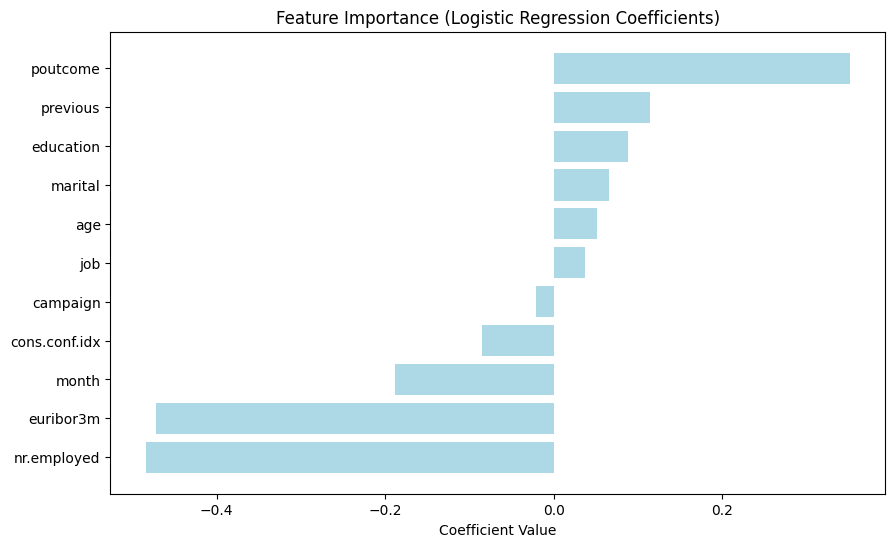

Model saved as logreg_model.pkl


In [1]:
import pandas as pd
df = pd.read_csv('../../01_Data/04_Cleaned_Data/Cleaned_Data.csv',sep=',')

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import joblib 

X = df.drop('y', axis=1)
y = df['y']

X_encoded = X.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy on Test Set: ", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

feature_names = X_encoded.columns
coefficients = logreg.coef_[0]

coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='lightblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.gca().invert_yaxis()
plt.show()

model_filename = 'logreg_model.pkl'
joblib.dump(logreg, model_filename)

print(f"Model saved as {model_filename}")